In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# read the contents of a csv file
df = pd.read_csv(r"datafiles\HR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# review the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# check for null values
df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [7]:
# show the rows with null values
df_null = df[df.isnull().any(axis=1)]
df_null.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low


In [8]:
# drop the rows with null values
df_drop = df.dropna()
# df_drop.info()
df = df_drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   department             15000 non-null  object 
 9   salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [9]:
# convert department and salary to numeric values using get_dummies
df_dummies = pd.get_dummies(df, columns=["department", "salary"])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      15000 non-null  float64
 1   last_evaluation         15000 non-null  float64
 2   number_project          15000 non-null  int64  
 3   average_monthly_hours   15000 non-null  int64  
 4   time_spend_company      15000 non-null  int64  
 5   Work_accident           15000 non-null  int64  
 6   left                    15000 non-null  int64  
 7   promotion_last_5years   15000 non-null  int64  
 8   department_IT           15000 non-null  uint8  
 9   department_RandD        15000 non-null  uint8  
 10  department_accounting   15000 non-null  uint8  
 11  department_hr           15000 non-null  uint8  
 12  department_management   15000 non-null  uint8  
 13  department_marketing    15000 non-null  uint8  
 14  department_product_mng  15000 non-null

In [10]:
# import scaler and tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# create and split the training and test sets
X = df_dummies.drop(['left'], axis=1)
y = df_dummies['left']
print("Shape: ", X.shape, y.shape)

Shape:  (15000, 22) (15000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# use a decision tree model to predict the data
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# print the scores
print(f"Training Data Score: {dtc.score(X_train, y_train)}")
print(f"Testing Data Score: {dtc.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9773333333333334


In [14]:
feature_importances = dtc.feature_importances_

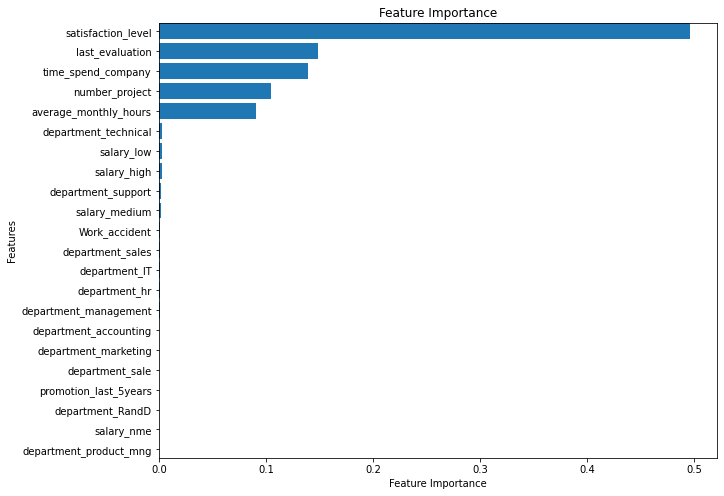

In [15]:
features = sorted(zip(X.columns, dtc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10, 8)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance')

plt.show()